In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

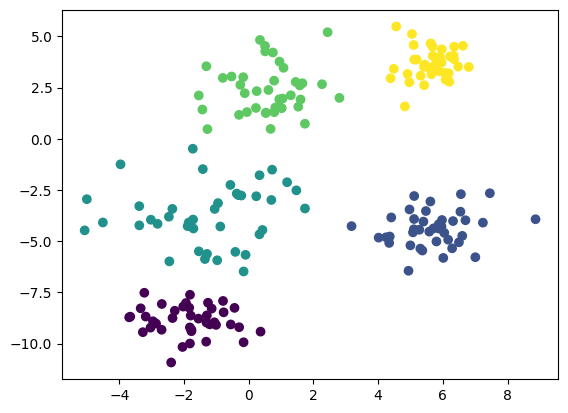

In [2]:
from sklearn.datasets import make_blobs

# generate the cluster data with 5 clusters

X, y = make_blobs(n_samples=200,n_features=2,centers=5,
           cluster_std=[1,0.9,1.4,1.2,0.7],random_state=40)

# plot the data
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

**Steps to perform K means clustering**:
1. Initialize the centroids (randomly select data points based on values of k)

2. For each data point:    
    1. Calculate the distance of each point from each initialized cluster.(Euclidean distance in our case).
    2. Select the minium distance and assign data point to that cluster.
3. Recalculate the centroids for newly made clusters. (Mean of all data points inside the cluster).
4. Shift the centroids to the new location and perform step 2 again.
5. Repeat steps 2 to 4 until the centroids stop to shift.(When shifting stops, call it convergence).

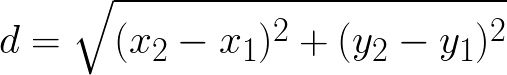

In [3]:
# define the function for euclidean distance

def euclidean_distance(point1,point2):
    distance = np.square(point1-point2)
    summed_distance = np.sum(distance,axis=1)
    return np.sqrt(summed_distance)

In [4]:
# define the function to calculate centroid of a cluster

def cluster_centroids(X):
    return np.mean(X,axis=0)

cluster_centroids(X[:5])

array([ 1.06338159, -4.34982547])

In [5]:
class KMeans:

    def __init__(self,n_clusters=2,max_iter=100,random_state=1):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.centroids = None


    def __cluster_initialize(self,X):
        np.random.seed(self.random_state)
        # index values of X for random selection
        index_values = np.random.randint(0,X.shape[0],size=self.n_clusters)
        # row sampling from X
        sample_rows = X[index_values,:]
        # assign the centroids
        self.centroids = sample_rows

    def __euclidean_distance(self,X,centroid):
        distance = np.square(X-centroid)
        summed_distance = np.sum(distance,axis=1)
        return np.sqrt(summed_distance)

    def __cluster_centroids(self,X,predictions):
        # empty array for each cluster centroid
        cluster_centers = []
        # loop n times for n clusters
        for i in range(self.n_clusters):
            # filter the data based on clusters
            X_filt = X[predictions == i,:]
            # take the mean of cluster data points
            centroid_point = np.mean(X_filt,axis=0)
            cluster_centers.append(centroid_point)
        # make a numpy array of cluster centers
        cluster_centers = np.array(cluster_centers)
        # assign the new centroid values
        self.centroids = cluster_centers


    def fit_predict(self,X):
        # initialize the centroids
        self.__cluster_initialize(X)

        for n in range(self.max_iter):

            # for each centroid(value of n_clusters)
            distances = []
            # loop and calculate distance for each cluster
            for i in range(self.n_clusters):
                # calculate the distance for each data point
                centroid_distance = self.__euclidean_distance(X,self.centroids[i,:])
                distances.append(centroid_distance)

            # make an array of all the distance values
            distances = np.array(distances)
            # do the predictions and assign the clusters based on minimum distances
            predictions = np.argmin(distances,axis=0)

            # assign new centroid values based on new clusters
            old_centroids = self.centroids
            self.__cluster_centroids(X,predictions=predictions)

            # condition to check the array values elementwise
            if np.array_equal(a1=old_centroids,a2=self.centroids):
                break

        return predictions

In [6]:
kmeans = KMeans(n_clusters=5,max_iter=100)
pred = kmeans.fit_predict(X)
centroids = kmeans.centroids

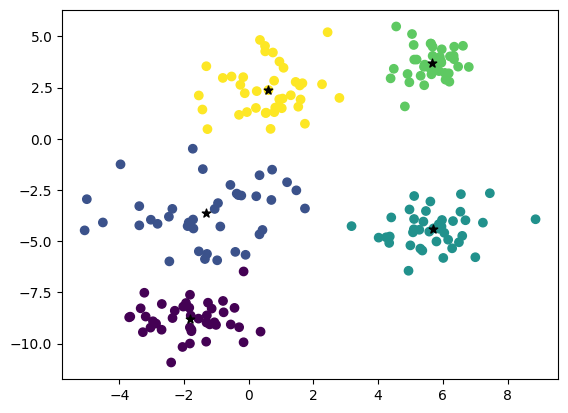

In [7]:
# plot the data
plt.scatter(X[:,0],X[:,1],c=pred)

# plot the centroids
plt.scatter(centroids[:,0],centroids[:,1],s=40,marker='*',facecolor='k',edgecolor='k')
plt.show()